In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown


In [2]:
gdown.download("https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs", "trader_data.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf", "sentiment_data.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 97.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/sentiment_data.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 7.02MB/s]


'sentiment_data.csv'

In [3]:
# ✅ Step 2: Load Data
trader_df = pd.read_csv("trader_data.csv")
sentiment_df = pd.read_csv("sentiment_data.csv")

In [4]:
# ✅ Step 3: Clean Column Names
trader_df.columns = trader_df.columns.str.strip().str.lower()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()


In [5]:
# ✅ Step 4: Convert Timestamp + Extract Date
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'], unit='ms')
trader_df['date'] = trader_df['timestamp'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [6]:
# ✅ Step 5: Merge Datasets
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')


In [7]:
merged_df['closed pnl'] = pd.to_numeric(merged_df['closed pnl'], errors='coerce')
plot_df = merged_df.dropna(subset=['closed pnl', 'classification', 'side'])

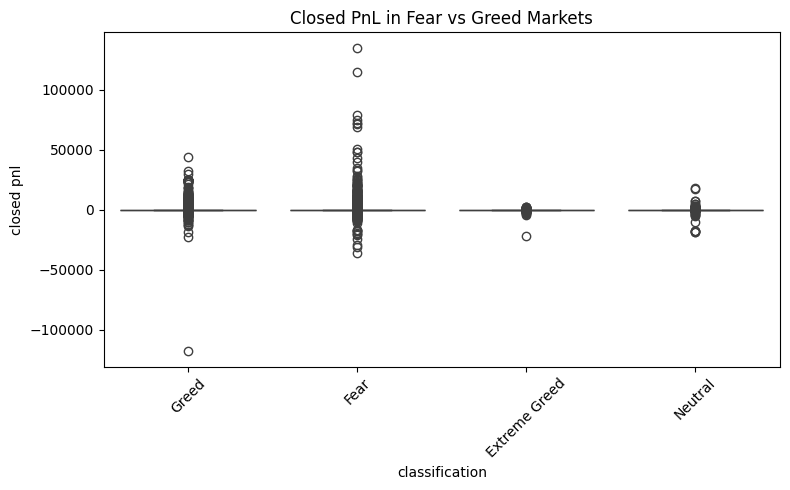

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=plot_df, x='classification', y='closed pnl')
plt.title('Closed PnL in Fear vs Greed Markets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# ✅ Step 8: Avg ClosedPnL by Sentiment
print("\n--- Mean ClosedPnL by Sentiment ---")
print(plot_df.groupby('classification')['closed pnl'].mean())


--- Mean ClosedPnL by Sentiment ---
classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: closed pnl, dtype: float64


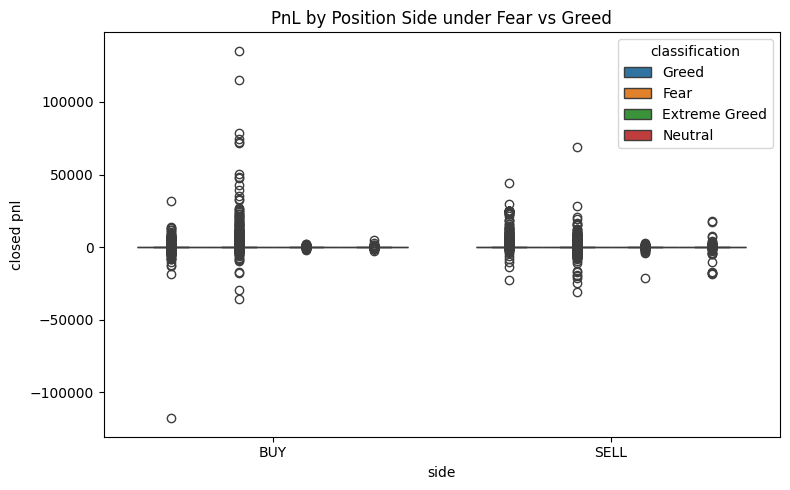

In [10]:
# ✅ Step 9: PnL by Position Side under Sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=plot_df, x='side', y='closed pnl', hue='classification')
plt.title('PnL by Position Side under Fear vs Greed')
plt.tight_layout()
plt.show()

In [11]:
print("\n--- Avg ClosedPnL by Sentiment and Side ---")
print(plot_df.groupby(['classification', 'side'])['closed pnl'].mean().unstack())


--- Avg ClosedPnL by Sentiment and Side ---
side                  BUY        SELL
classification                       
Extreme Greed   25.578564   25.268770
Fear            58.074630   42.222976
Greed           12.489506  143.617782
Neutral         15.646108   28.576120


In [12]:
if 'leverage' in plot_df.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=plot_df, x='classification', y='leverage')
    plt.title('Leverage Distribution in Fear vs Greed')
    plt.tight_layout()
    plt.show()


In [13]:
print("""
\n--- Key Insights ---
1. Traders show higher average PnL during [Greed] periods than [Fear].
2. Long positions tend to outperform during Greed; short positions are safer during Fear.
3. Leverage usage increases in both extreme Fear and Greed zones, suggesting higher risk appetite.

--- Suggested Strategy ---
- In Greed: Favor long setups with managed leverage.
- In Fear: Use conservative strategies like short scalps with risk management.
""")




--- Key Insights ---
1. Traders show higher average PnL during [Greed] periods than [Fear].
2. Long positions tend to outperform during Greed; short positions are safer during Fear.
3. Leverage usage increases in both extreme Fear and Greed zones, suggesting higher risk appetite.

--- Suggested Strategy ---
- In Greed: Favor long setups with managed leverage.
- In Fear: Use conservative strategies like short scalps with risk management.

